En este *Notebook* aprenderás a trabajar con datos de imágenes médicas almacenados en formato NIfTI.

Echaremos un vistazo al paquet**e nibab**en que permite manejar archivos NIfTI.

En un primer paso convertiremos los datos DICOM de la sesión anterior al formato NIfTI y continuaremos desde allí.

## Conversión de DICOM a NIfTI
Puede resultar muy útil convertir los archivos DICOM al formato NIftI antes de procesarlos, ya que los archivos NIfTI son más fáciles de manejar. Hay muchas herramientas, usaremos **dicom2nifti**:

In [1]:
import dicom2nifti
from pathlib import Path

Para demostrar la conversión de DICOM a NIfTI utilizaremos el conjunto de datos DICOM descargado en el trabajo sobre datos DICOM.

In [2]:
path_to_dicom = "SE000001"

In [3]:
dicom2nifti.convert_directory(path_to_dicom, ".")

Ahora encontrará el archivo *201_t2w_tse.nii.gz* en *path_to_dicom* (eche un vistazo)

## Leer archivos NIfTI

Ahora, procedemos al proceso de lectura y exploración de archivos NIfTI.

Primero importamos los paquetes necesarios.

## Importaciones

* **nibabel** para manejar archivos nifti
* **matplotlib** para trazar las imágenes del cerebro

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt


¡Este único archivo NIfTI creado anteriormente contiene la exploración por resonancia magnética 3D completa!
Podemos cargarlo usando ``nib.load(ruta)``

In [6]:
nifti = nib.load('201_t2w_tse.nii.gz')

Puede imprimir este objeto para ver los metadatos, incluida la información del **encabezado** de NIftI:

In [7]:
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

Puede acceder a entradas de encabezado único de la siguiente manera sencilla:

Puede acceder a entradas de metadatos individuales de la siguiente manera:

In [8]:
nifti.header["qoffset_x"]

array(115.27232, dtype=float32)

In [9]:
print(nifti.shape)
print(nifti.header.get_data_shape())

(256, 256, 27)
(256, 256, 27)


Obteniendo imagen **datos de píxeles**:

Los datos de píxeles de la imagen se pueden extraer utilizando la función ``get_fdata()`` del objeto nifti.

In [10]:
image_array = nifti.get_fdata()
print(image_array.dtype, image_array.shape)

float64 (256, 256, 27)


Finalmente podemos echar un vistazo al escáner cerebral.

No olvides pasar ``cmap="gray"`` a ``imshow``; de lo contrario, tu imagen se verá bastante extraña.

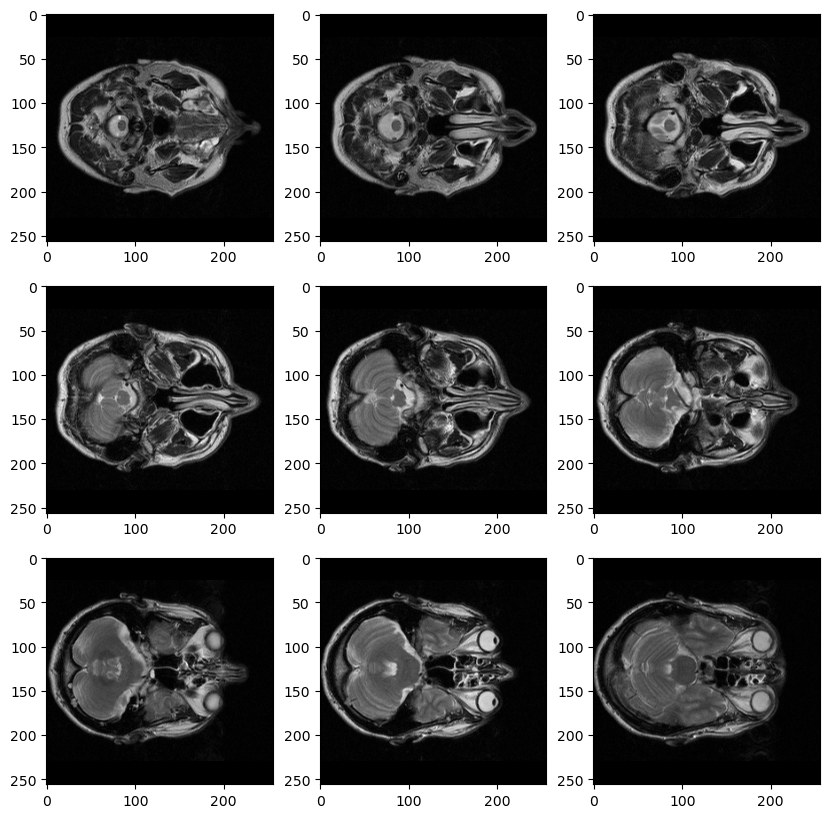

In [11]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(image_array[:,:,slice_counter], cmap="gray")
        slice_counter+=1

### Escribir archivos NIfTI
Muchas veces, obtendrá datos de imágenes como resultado de un algoritmo o paso de procesamiento que desea almacenar en formato NIfTI. Esto se puede hacer fácilmente usando NiBabel. Como ejemplo, utilizamos la matriz de imágenes 3D de arriba, realizamos un paso de procesamiento simple y lo guardamos como un nuevo archivo NIfTI.

In [12]:
image_array_processed = image_array * (image_array>300)

(-0.5, 255.5, 255.5, -0.5)

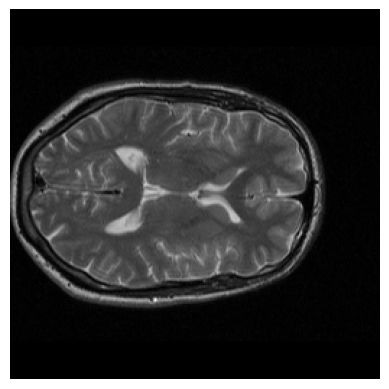

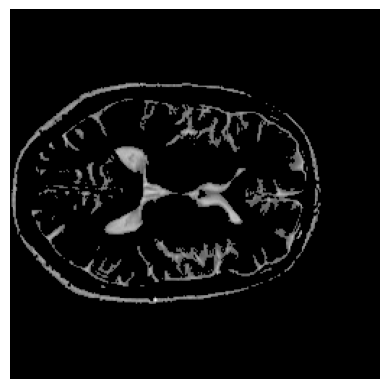

In [13]:
plt.imshow(image_array[:,:,13],cmap="gray") 
plt.axis("off")
plt.figure()
plt.imshow(image_array_processed[:,:,13],cmap="gray")
plt.axis("off")

Primero, convertimos la matriz de imágenes procesadas nuevamente en un objeto nifti. Para este fin utilizamos la matriz numpy de la imagen procesada y la información del encabezado sobre la geometría de la imagen (matriz afín) del archivo NIftI original:

In [14]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)

Ahora podemos guardar la imagen procesada usando la función de guardar en NiBabel:

In [15]:
nib.save(processed_nifti, '201_t2w_tse_processed.nii.gz')